#### Objective of the exercise:
- How to implement K-Nearest Neighbors algorithm in python
- How to work with real dataset and evaluate KNN algorithm
- How to use KNN to make a prediction for new data

#### Dataset description
This dataset has been used to predict the flower species utilizing the measurements of the Iris
flowers. Iris is a plant with showy flowers. It takes its name from the Greek word for a rainbow, which
is also the name for the Greek goddess of the rainbow, 

The dataset contains 150 observations (rows) with 4 features (input variables) and one output
variable (label). The Iris dataset is a balanced dataset, which means that there are equal number of
instances in each class.

Figure 1 shows pairwise relationships in the given dataset.

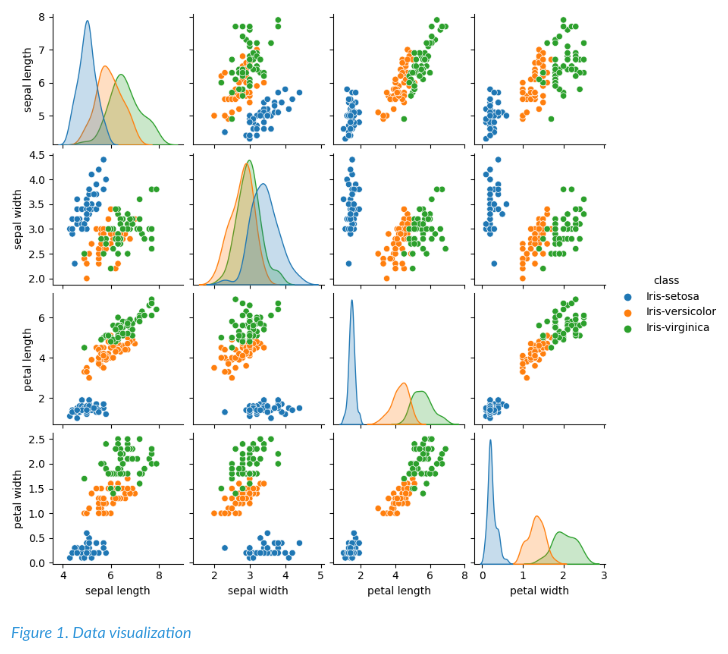

The variable names are as follow:
- Sepal length in cm.
- Sepal width in cm.
- Petal length in cm.
- Petal width in cm.
- Class
  - Iris Setosa
  - Iris Versicolour
  - Iris Virginica

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

import math

In [8]:
df_iris = pd.read_csv('iris_dataset/iris.csv', header=None, names=['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])

df_iris.info()
df_iris.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
pd.factorize(df_iris['class'])

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 Index(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='object'))

#### Tasks is to implement three main functions to
1. Calculate the distance
2. Find the nearest neighbors
3. Make the predictions

#### 1. Calculate the distance

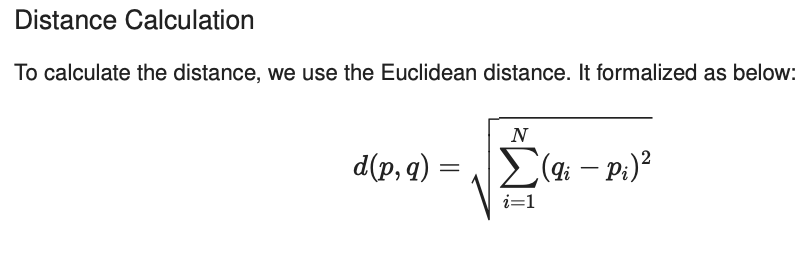

Where 'p' and 'q' are two feature vectors from our dataset. 'i' is the index of a specific feature and 'N' the number of features in the dataset.
With Euclidean distance, the smaller values represent the higher similarity between corresponding
feature vctors. The value zero indicates the absolute similarity.

In [10]:
# calculating Euclidean distance for 2 data points
def calc_Euclidean_distance(point1, point2):
    """
    Calculates Euclidean distance for 2 points.

    Args:
        point1 (list): first data point.
        point2 (list): second data point

    Returns:
        float: The Euclidean distance between 2 points.
    """
    return math.sqrt(math.fsum(math.pow(q - p, 2) for p, q in zip(point1, point2)))


#### 2. Finding the Nearest Neighbors
To find the nearest neighbors, we need to calculate the distance between each data points in our
dataset and the new data point. We can do so by using the distance function explained above.

After calculating the distances, we sort all of the data points based on their distance to the new data
point. Then we return the top K as the nominated neighbors

In [11]:
def find_nearest_neighbors(training_data, labels, test_point, k):
    """ 
    Finds the nearest neighbors for a test point.

    Args:
        training_data (list): training data.
        labels (list): labels for the training data.
        test_point (list): test point
        k (int): number of nearest neighbors to find.

    Returns:
        list: list of nearest neighbors
    """
    distances = []
    for data_point, label in zip(training_data, labels):
        dist = calc_Euclidean_distance(test_point, data_point)
        distances.append((dist, label))
    
    # sorting by distance
    distances.sort(key=lambda x: x[0])
    
    # returns top k neighbors as described above
    neighbors = distances[:k]
    return neighbors


#### 3. Make  predictions
The new data point's class can be determined from the most similar neighbors that we have
obtained. As we work on a classification task, our prediction will be the most represented class
among the selected neighbors.

To achieve this, we can use the function 'max()' in python (https://docs.python.org/3/library/functions.html#max).

In [12]:
def make_prediction(neighbors):
    """
    Makes a prediction for a test point.

    Args:
        neighbors (list): list of nearest neighbors.

    Returns:
        str: The predicted class.
    """
    # extracting the labels from the neighbors
    labels = [neighbor[1] for neighbor in neighbors]
    
    # returning the most common label
    return max(set(labels), key=labels.count)



#### Goal
Final goal of this exercise is to classify the data point below.

In [13]:
new_dp = [7.0, 3.1, 1.3, 0.7]


In [14]:
# preparing the data
X_train = df_iris[['sepal length', 'sepal width', 'petal length', 'petal width']].values.tolist()
y_train = df_iris['class'].tolist()

# directly making prediction with k = 5 for example for new_dp
neighbors = find_nearest_neighbors(X_train, y_train, new_dp, k=5)
prediction = make_prediction(neighbors)

print(f"Prediction is: {prediction}")


Prediction is: Iris-setosa


### The direct run with current implemantation says new_dp is Iris-setosa, let's check it on the differents plots by looking at all the features we have

In [31]:
# let's first plot the data with features and then look at the new_dp
def plot_knn_test(X, y, test_point, k=3, feature1='sepal length', feature2='petal length'):
    """
    Plots the KNN example with the test point and its neighbors.

    Args:
        X (list): training data.
        y (list): labels for the training data.
        test_point (list): test point.
        k (int): number of nearest neighbors to find.
        feature1 (str): first feature to plot.
        feature2 (str): second feature to plot. 
    """
    plt.figure(figsize=(10, 8))
    colors = {'Iris-setosa': 'r', 'Iris-versicolor': 'g', 'Iris-virginica': 'b'}
    
    # creating a mapping of feature names to indices
    feature_indices = {
        'sepal length': 0,
        'sepal width': 1,
        'petal length': 2,
        'petal width': 3
    }
    
    for species in df_iris['class'].unique():
        species_data = df_iris[df_iris['class'] == species]
        plt.scatter(species_data[feature1], species_data[feature2], 
                    c=colors[species], label=species, alpha=0.6)
    
    # we use indices to access test_point
    plt.scatter(test_point[feature_indices[feature1]], 
                test_point[feature_indices[feature2]], 
                c='black', s=200, marker='*', label='Test Point')
    
    neighbors = find_nearest_neighbors(X, y, test_point, k)
    
    # Separate scatter plot for nearest neighbors
    neighbor_points = [X[y.index(neighbor[1])] for neighbor in neighbors]
    plt.scatter([p[feature_indices[feature1]] for p in neighbor_points],
                [p[feature_indices[feature2]] for p in neighbor_points],
                c='cyan', s=100, edgecolors='black', label='Nearest Neighbours')
    
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title(f'KNN example (k={k})')
    plt.legend()
    plt.show()


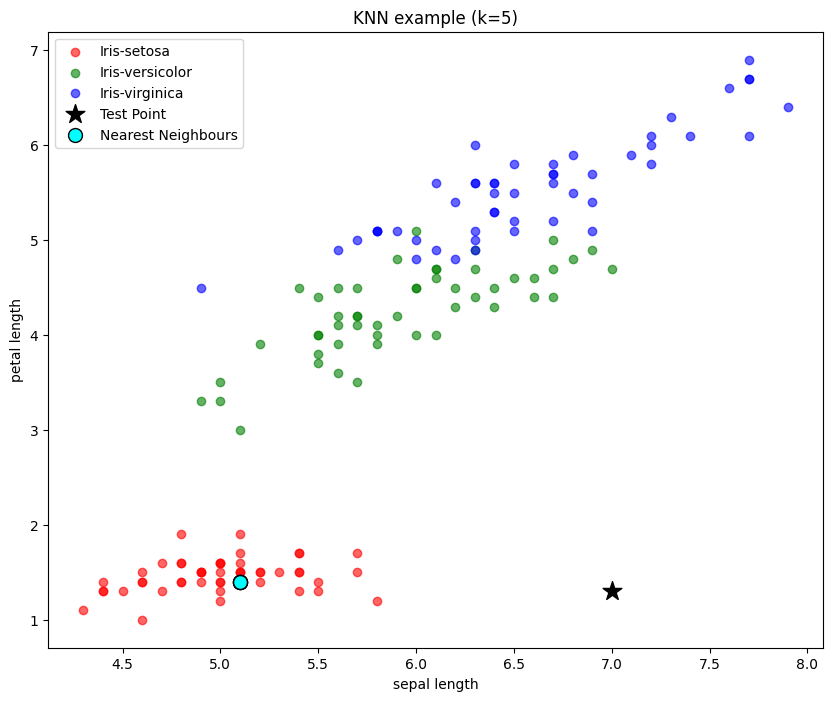

In [40]:
# let's check the new_dp on the plot
plot_knn_test(X_train, y_train, new_dp, k=5)


### Aha! This is very suspicous (that means KNN has limitations? or our dataset is limited?), the test black star point is far-far from the other data points, but based on the Euclidean distance calculations, its 5 nearest neighbors are all from the Iris-setosa class, and I wouldn't consider this as an Iris-setosa dp to be honest. Let's check other features though

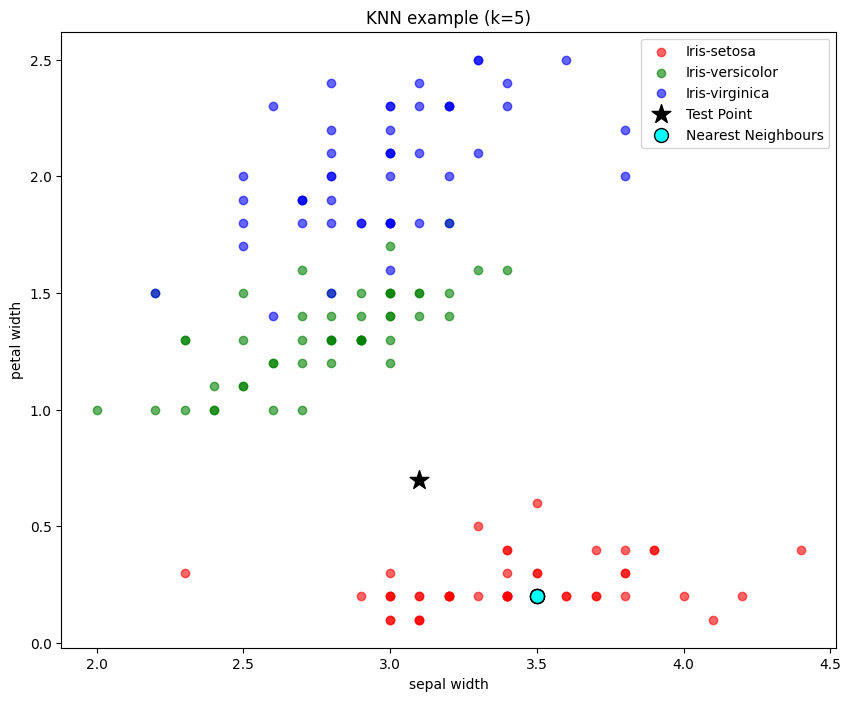

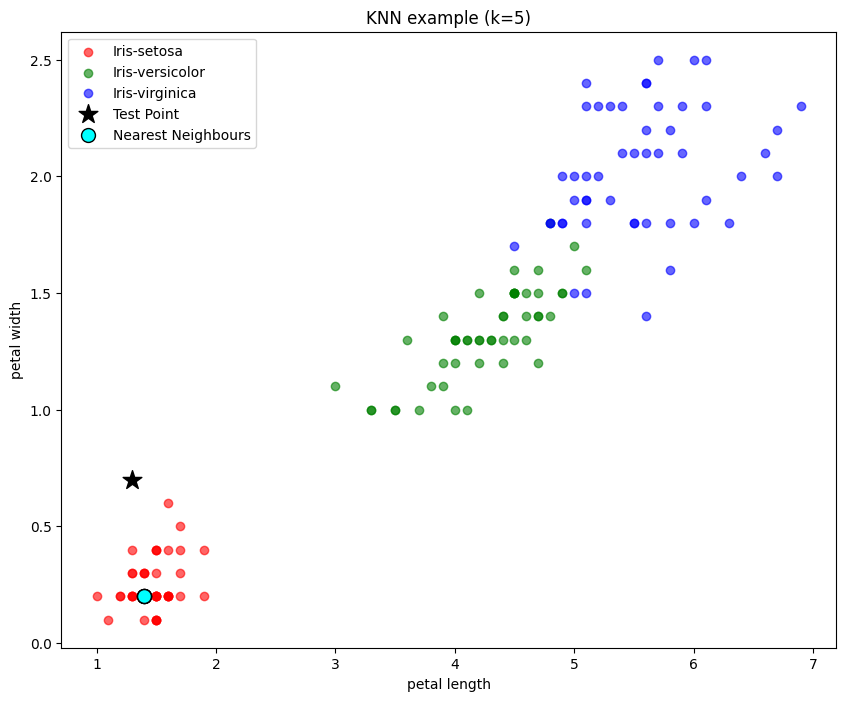

In [34]:
plot_knn_test(X_train, y_train, new_dp, k=5, feature1='sepal width', feature2='petal width')

plot_knn_test(X_train, y_train, new_dp, k=5, feature1='petal length', feature2='petal width')


#### Yes, that makes more sense now, so I plotted a new datapoint 'new_dp' as we can see, and 'new_dp' is indeed kind of closer to the red dots that are Iris-Setosa (especially on petal width vs petal length, closer distances), but I think new_dp is a different class at all, and we are running into limitations of the method and the dataset used in this work here. 

### Let's also test different k values to see how it affects the results

In [46]:
k_values_range = [x for x in range(1, 21)] # used 1-20 data points when making a prediction

# test different k values
for k in k_values_range:
    neighbors = find_nearest_neighbors(X_train, y_train, new_dp, k)
    prediction = make_prediction(neighbors)
    print(f"for k = {k} the prediction is: {prediction}")

for k = 1 the prediction is: Iris-setosa
for k = 2 the prediction is: Iris-setosa
for k = 3 the prediction is: Iris-setosa
for k = 4 the prediction is: Iris-setosa
for k = 5 the prediction is: Iris-setosa
for k = 6 the prediction is: Iris-setosa
for k = 7 the prediction is: Iris-setosa
for k = 8 the prediction is: Iris-setosa
for k = 9 the prediction is: Iris-setosa
for k = 10 the prediction is: Iris-setosa
for k = 11 the prediction is: Iris-setosa
for k = 12 the prediction is: Iris-setosa
for k = 13 the prediction is: Iris-setosa
for k = 14 the prediction is: Iris-setosa
for k = 15 the prediction is: Iris-setosa
for k = 16 the prediction is: Iris-setosa
for k = 17 the prediction is: Iris-setosa
for k = 18 the prediction is: Iris-setosa
for k = 19 the prediction is: Iris-setosa
for k = 20 the prediction is: Iris-setosa


It is good that it is stable. Let's try more, which is crazy actualy since as I increase 'k' it can demonstrates the transition from a local classification that is based on nearest neighbors to a more global one (to the whole dataset)

In [53]:
k_values_range = [x for x in range(100, 125)] # used 100-124 data points when making a prediction

# test different k values
for k in k_values_range:
    neighbors = find_nearest_neighbors(X_train, y_train, new_dp, k)
    prediction = make_prediction(neighbors)
    print(f"for k = {k} the prediction is: {prediction}")

for k = 100 the prediction is: Iris-setosa
for k = 101 the prediction is: Iris-setosa
for k = 102 the prediction is: Iris-setosa
for k = 103 the prediction is: Iris-setosa
for k = 104 the prediction is: Iris-setosa
for k = 105 the prediction is: Iris-setosa
for k = 106 the prediction is: Iris-setosa
for k = 107 the prediction is: Iris-setosa
for k = 108 the prediction is: Iris-setosa
for k = 109 the prediction is: Iris-versicolor
for k = 110 the prediction is: Iris-versicolor
for k = 111 the prediction is: Iris-versicolor
for k = 112 the prediction is: Iris-versicolor
for k = 113 the prediction is: Iris-versicolor
for k = 114 the prediction is: Iris-versicolor
for k = 115 the prediction is: Iris-versicolor
for k = 116 the prediction is: Iris-versicolor
for k = 117 the prediction is: Iris-versicolor
for k = 118 the prediction is: Iris-versicolor
for k = 119 the prediction is: Iris-versicolor
for k = 120 the prediction is: Iris-versicolor
for k = 121 the prediction is: Iris-versicolor
fo

In [60]:
k_values_range = [x for x in range(140, 155)] # almost the entire dataset, all data points

# test different k values
for k in k_values_range:
    neighbors = find_nearest_neighbors(X_train, y_train, new_dp, k)
    prediction = make_prediction(neighbors)
    print(f"for k = {k} the prediction is: {prediction}")

for k = 140 the prediction is: Iris-versicolor
for k = 141 the prediction is: Iris-versicolor
for k = 142 the prediction is: Iris-versicolor
for k = 143 the prediction is: Iris-versicolor
for k = 144 the prediction is: Iris-versicolor
for k = 145 the prediction is: Iris-versicolor
for k = 146 the prediction is: Iris-versicolor
for k = 147 the prediction is: Iris-versicolor
for k = 148 the prediction is: Iris-versicolor
for k = 149 the prediction is: Iris-versicolor
for k = 150 the prediction is: Iris-virginica
for k = 151 the prediction is: Iris-virginica
for k = 152 the prediction is: Iris-virginica
for k = 153 the prediction is: Iris-virginica
for k = 154 the prediction is: Iris-virginica


Based on these a bit crazy and meaningless experiments with different 'k' values the new data point is consistently classified as Iris-setosa for smaller and more reasonable k values (around 1-20) This means that these k values are most probably better for this dataset and it balances between considering enough neighbors and we are still focusing on local nearest patterns (the optimal k should ideally be chosen with for example cross-validation on the entire dataset and not just for this single point, but this is not the goal of this assignment as I understood)


# Summary
KNN method with Euclidean distance shows correct results from technical point of view of my implementation and I followed all the recomendations, but I got lots of doubts when visualising the data. The new data point looks closer to the Iris-setosa indeed as KNN suggests, but at the same time for me personally (intuitively) it seems that it may belong to a completely different class that is not actually described in the dataset. 

My assumption is that the current dataset is not very helpful when applied to the new data point 'new_dp' and leads to misunerstanding of the output. The result of the method is not very sensitive to choices of metric, but more on the dataset itself. Even though I got results, the method can produce inaccurate conclusions without our understanding of the limitation of the method and the dataset. It is fine in this example when I can look at the data and can see it easily and check all the features I have, but when we have a lot of features it is easy to loose control and the whole task can become more time-consuming, so it is important to understand the limietations both of the dataset and the method that is being used.